# RQ 1: Identify gird point indices for flux boundary calculations

In [2]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import os
from itertools import compress
import datetime as dt

%matplotlib notebook

In [5]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar
import viz_tools as vt

##### Load domain dimensions for reference:

In [6]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 
tmask_sub = tmask[0,:,1480:2050,160:800]

In [7]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

In [8]:
ref   = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12-EXH006_y2015m01d05_gridT.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
lons  = np.array(ref.variables['nav_lon'])[1480:2050,160:800]
lats  = np.array(ref.variables['nav_lat'])[1480:2050,160:800]
depth = np.array(ref.variables['deptht'])

#### Find indices of grid points associated with each of the boundaries

<IPython.core.display.Javascript object>


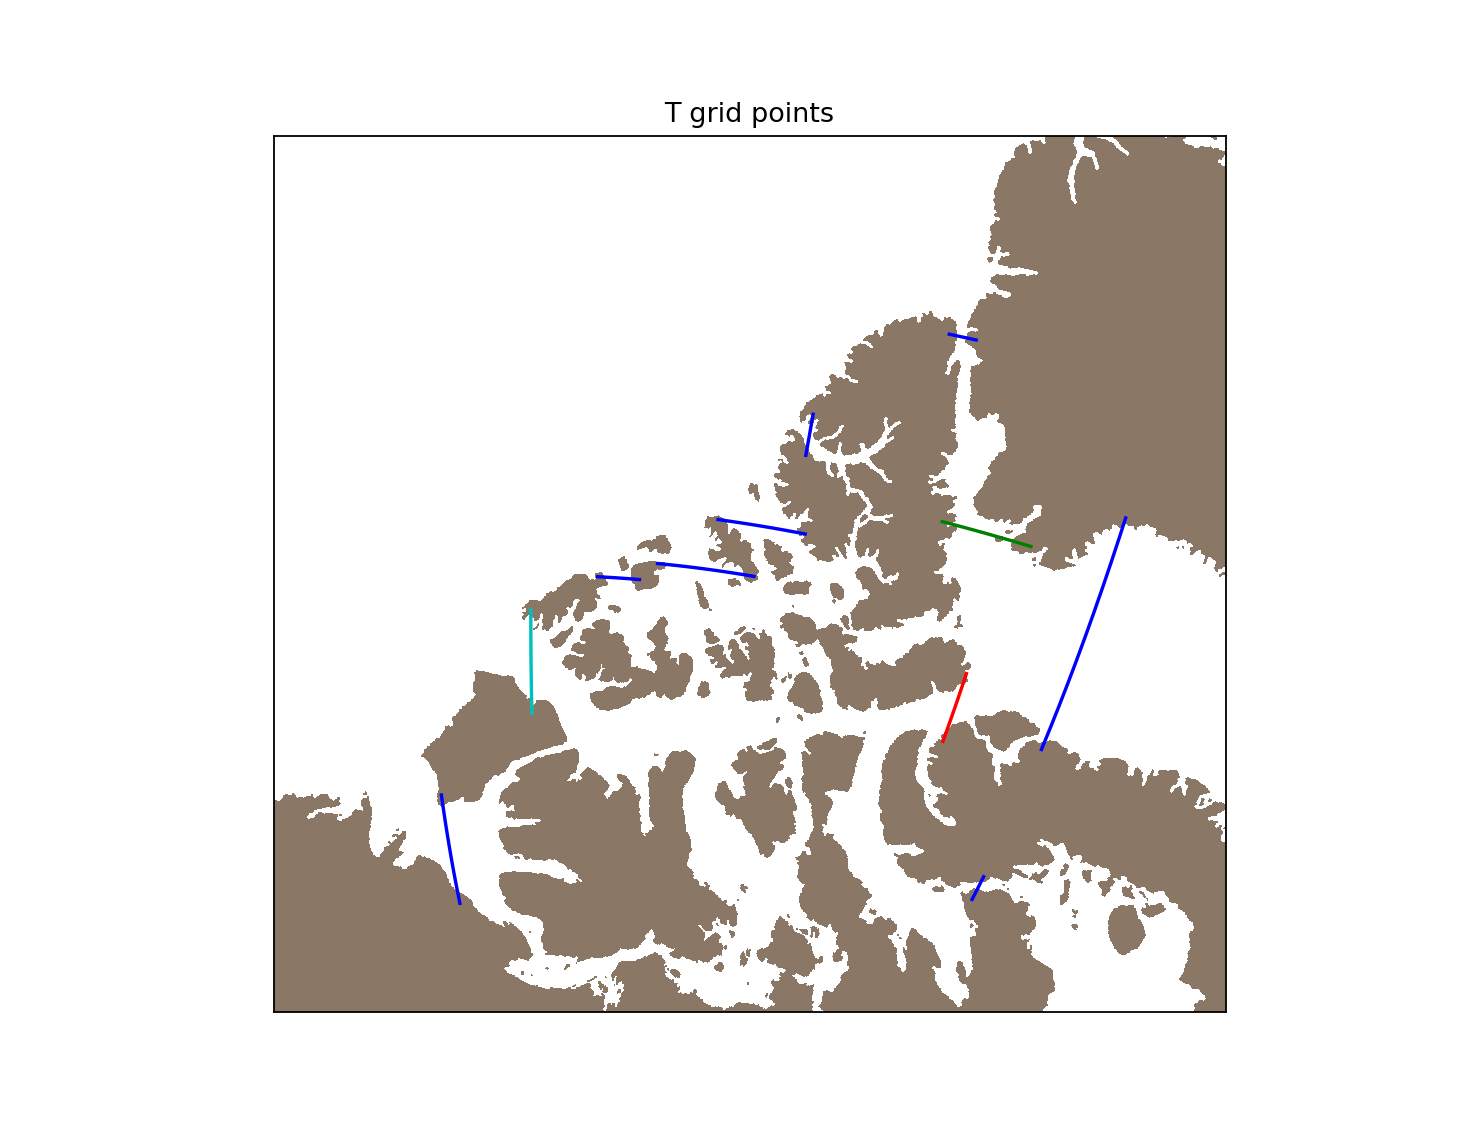

In [10]:
fig, ax1 = plt.subplots(figsize=(9,7))

proj1=Basemap(projection='eqdc',lat_0 = 78.0, lon_0 = -100, resolution='i', width=2.5e6, height=2.3e6, ax=ax1)
x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
ax1.set_title('T grid points')

# proj1.plot(x_model[1480:2050:10,160:800:10], y_model[1480:2050:10,160:800:10], '-k')
# proj1.plot(x_model[1480:2050:10,160:800:10].T, y_model[1480:2050:10,160:800:10].T, '-k')

#left side:
proj1.plot(x_model[2013,300:392], y_model[2013,300:392], '-b')
proj1.plot(x_model[1935,450:530], y_model[1935,450:530], '-c')
proj1.plot(x_model[1850:1885,555], y_model[1850:1885,555], '-b')
proj1.plot(x_model[1753:1837,568], y_model[1753:1837,568], '-b')
proj1.plot(x_model[1720:1790,605], y_model[1720:1790,605], '-b')
proj1.plot(x_model[1730,660:690], y_model[1730,660:690], '-b')

#top:
proj1.plot(x_model[1635:1653,760], y_model[1635:1653,760], '-b')

#right:
proj1.plot(x_model[1520,505:673], y_model[1520,505:673], '-b')
proj1.plot(x_model[1520,385:405], y_model[1520,385:405], '-b')

# middle:
proj1.plot(x_model[1570:1630,635], y_model[1570:1630,635], '-g')
proj1.plot(x_model[1585,485:538], y_model[1585,485:538], '-r')

The coordinates:

In [26]:
# naming convention
# - first letter indicates the side of the CAA
# - second letter is number from bottom up
# - i and j directions are based on 1st and 2nd element of lons,lats dimensions

l1i = 2013; l1j = np.arange(300,392)
l2i = 1935; l2j = np.arange(450,530)
l3i = np.arange(1850,1885); l3j = 555
l4i = np.arange(1753,1837); l4j = 568
l5i = np.arange(1720,1790); l5j = 605
l6i = 1730; l6j = np.arange(660,690)

t1i = np.arange(1635,1653); t1j = 760

r1i = 1520; r1j = np.arange(505,673)
r2i = 1520; r2j = np.arange(385,405)

#Nares:
N1i = np.arange(1570,1630); N1j = 635

#Parry channel
P1i = 1585; P1j = np.arange(485,538)

### Write boundary coordinates to NetCDF file:

In [148]:
ncd = nc.Dataset('/ocean/brogalla/GEOTRACES/data/CAA_boundaries.nc', 'w', zlib=True)
ncd.createDimension('x', lon.shape[1])
ncd.createDimension('y', lon.shape[0])
ncd.createDimension('z', depth.shape[0])
ncd.createDimension('t', None)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 't', size = 0

In [149]:
nav_lon = ncd.createVariable('nav_lon', 'float64', ('y','x'))
nav_lon.units = 'degrees East'
nav_lon.long_name = 'Longitudes'
nav_lon[:] = lon

nav_lat = ncd.createVariable('nav_lat', 'float64', ('y','x'))
nav_lat.units = 'degrees North'
nav_lat.long_name = 'Latitudes'
nav_lat[:] = lat

In [150]:
WPCx = ncd.createVariable('bdy_xWPC', 'float64', ('t'))
WPCx.units = 'ANHA12 coordinates; x'
WPCx.long_name = 'Western Parry Channel boundary'
WPCx[:] = bdy_xWPC

WPCy = ncd.createVariable('bdy_yWPC', 'float64', ('t'))
WPCy.units = 'ANHA12 coordinates; y'
WPCy.long_name = 'Western Parry Channel boundary'
WPCy[:] = bdy_yWPC

In [151]:
EPCx = ncd.createVariable('bdy_xEPC', 'float64', ('t'))
EPCx.units = 'ANHA12 coordinates; x'
EPCx.long_name = 'Eastern Parry Channel boundary'
EPCx[:] = bdy_xEPC

EPCy = ncd.createVariable('bdy_yEPC', 'float64', ('t'))
EPCy.units = 'ANHA12 coordinates; y'
EPCy.long_name = 'Western Parry Channel boundary'
EPCy[:] = bdy_yEPC

In [152]:
SNSx = ncd.createVariable('bdy_xSNS', 'float64', ('t'))
SNSx.units = 'ANHA12 coordinates; x'
SNSx.long_name = 'Southern Nares Strait'
SNSx[:] = bdy_xSNS

SNSy = ncd.createVariable('bdy_ySNS', 'float64', ('t'))
SNSy.units = 'ANHA12 coordinates; y'
SNSy.long_name = 'Southern Nares Strait'
SNSy[:] = bdy_ySNS

In [153]:
NNSx = ncd.createVariable('bdy_xNNS', 'float64', ('t'))
NNSx.units = 'ANHA12 coordinates; x'
NNSx.long_name = 'Northern Nares Strait'
NNSx[:] = bdy_xNNS

NNSy = ncd.createVariable('bdy_yNNS', 'float64', ('t'))
NNSy.units = 'ANHA12 coordinates; y'
NNSy.long_name = 'Northern Nares Stra+1480 it'
NNSy[:] = bdy_yNNS

In [154]:
WNSx = ncd.createVariable('bdy_xWNS', 'float64', ('t'))
WNSx.units = 'ANHA12 coordinates; x'
WNSx.long_name = 'Western Nares Strait'
WNSx[:] = bdy_xWNS

WNSy = ncd.createVariable('bdy_yWNS', 'float64', ('t'))
WNSy.units = 'ANHA12 coordinates; y'
WNSy.long_name = 'Western Nares Strait'
WNSy[:] = bdy_yWNS

In [155]:
WCAAx = ncd.createVariable('bdy_xWCAA', 'float64', ('t'))
WCAAx.units = 'ANHA12 coordinates; x'
WCAAx.long_name = 'Western CAA'
WCAAx[:] = bdy_xWCAA

WCAAy = ncd.createVariable('bdy_yWCAA', 'float64', ('t'))
WCAAy.units = 'ANHA12 coordinates; y'
WCAAy.long_name = 'Western CAA'
WCAAy[:] = bdy_yWCAA

In [156]:
SCAAx = ncd.createVariable('bdy_xSCAA', 'float64', ('t'))
SCAAx.units = 'ANHA12 coordinates; x'
SCAAx.long_name = 'Southern CAA'
SCAAx[:] = bdy_xSCAA

SCAAy = ncd.createVariable('bdy_ySCAA', 'float64', ('t'))
SCAAy.units = 'ANHA12 coordinates; y'
SCAAy.long_name = 'Southern CAA'
SCAAy[:] = bdy_ySCAA

In [157]:
FSx = ncd.createVariable('bdy_xFS', 'float64', ('t'))
FSx.units = 'ANHA12 coordinates; x'
FSx.long_name = 'Fury Sound'
FSx[:] = bdy_xFS

FSy = ncd.createVariable('bdy_yFS', 'float64', ('t'))
FSy.units = 'ANHA12 coordinates; y'
FSy.long_name = 'Fury Sound'
FSy[:] = bdy_yFS

In [158]:
ncd.close()

# Old functions

In [7]:
def indx(bdy_lon, bdy_lat):

    x_list = []
    y_list = []
    for i in range(0, len(bdy_lon)):
        x, y = ar.find_closest_model_point(bdy_lon[i], bdy_lat[i], lons, lats)
        x_list = np.append(x_list, x)
        y_list = np.append(y_list, y)
        
    return x_list, y_list

In [8]:
def find_bdy_coordinates(bdy_lon, bdy_lat):
    # find the model coordinates for the specific lat, lon:
    x_lon, y_lat = indx(bdy_lon, bdy_lat)
    
    # if the length of the x array is longer than y:
    if np.abs(x_lon[0]-x_lon[-1]) > np.abs(y_lat[0]-y_lat[-1]):
        # x points by integer
        if x_lon[-1]-x_lon[0] < 0:
            x_lons = np.arange(x_lon[0], x_lon[-1], -1)
        else:
            x_lons = np.arange(x_lon[0], x_lon[-1], 1)
        # y points by length of x
        y_lats = np.floor(np.linspace(y_lat[0], y_lat[-1], len(x_lons)))
        
    else:
        
        if y_lat[-1]-y_lat[0] < 0:
            y_lats = np.arange(y_lat[0], y_lat[-1], -1)
        else:
            y_lats = np.arange(y_lat[0], y_lat[-1], 1)
            
        x_lons = np.floor(np.linspace(x_lon[0], x_lon[-1], len(y_lats)))

    bdy_listx = np.empty(x_lons.shape)
    bdy_listy = np.empty(y_lats.shape)
    item = 0

    print(x_lons.shape, y_lats.shape)
    for i in range(0, len(x_lons)):    
        # only include those coordinates which are not on land
        if tmask[0,0, int(x_lons[i])+1480, int(y_lats[i])+160] != 0:
            # shift to full domain coordinates
            bdy_listx[item] = int(x_lons[i]) #lon[int(x_lons[i])+1480, int(y_lats[i])+160] 
            bdy_listy[item] = int(y_lats[i])  #lat[int(x_lons[i])+1480, int(y_lats[i])+160]
            item+=1
    
    bdy_listx = list(map(int, bdy_listx))
    bdy_listy = list(map(int, bdy_listy))
    return bdy_listx, bdy_listy

In [9]:
bdy_xNNS, bdy_yNNS   = find_bdy_coordinates([-61.184, -63.085], [81.775, 81.984])
bdy_xSNS, bdy_ySNS   = find_bdy_coordinates([-68.753, -78.325], [76.400, 76.611])
bdy_xWPC, bdy_yWPC = find_bdy_coordinates([-123.333, -120.748], [74.314, 75.973])
bdy_xEPC, bdy_yEPC = find_bdy_coordinates([-82.796, -82.376], [74.566, 73.672])
bdy_xWNS, bdy_yWNS = find_bdy_coordinates([-79.845, -81.520], [76.289, 75.712])
bdy_xWCAA, bdy_yWCAA = find_bdy_coordinates([-79.487, -117.360], [82.781, 77.3239])
bdy_xSCAA, bdy_ySCAA = find_bdy_coordinates([-122.2746, -121.288], [69.801, 71.477])
bdy_xFS, bdy_yFS = find_bdy_coordinates([-83.905, -83.865], [70.019, 69.632])

(9,) (9,)
